In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Preprocessing**

In [107]:
store_df = pd.read_excel('superstore.xlsx')
store_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [108]:
store_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [109]:
store_df['Order Date'] = pd.to_datetime(store_df['Order Date'])

In [110]:
#Feature Engineering
store_df['Order Year'] = store_df['Order Date'].dt.year
store_df['Order Month'] = store_df['Order Date'].dt.month
store_df['Order Day'] = store_df['Order Date'].dt.day
store_df['Order DayOfWeek'] = store_df['Order Date'].dt.dayofweek

In [111]:
store_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Order DayOfWeek
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,6


In [112]:
# Create a Profit Margin column
store_df['Profit Margin'] = store_df['Profit'] / store_df['Sales']

In [113]:
#Dropping unnecessary columns
store_df.drop(columns=['Row ID', 'Customer Name', 'Postal Code'], inplace=True)

In [114]:
#check duplicate rows
store_df.duplicated().sum()

#drop duplicate rows
store_df.drop_duplicates(inplace=True)

**EDA**

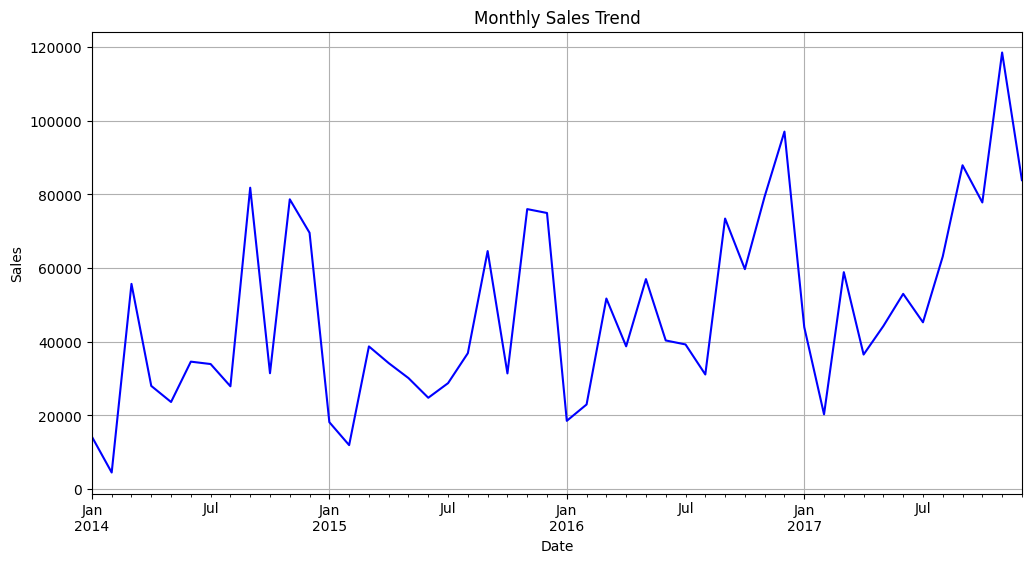

In [115]:
# Sales Trend Over Time
store_df.set_index('Order Date', inplace=True)
plt.figure(figsize=(12, 6))
store_df['Sales'].resample('ME').sum().plot(title='Monthly Sales Trend', color='b')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()

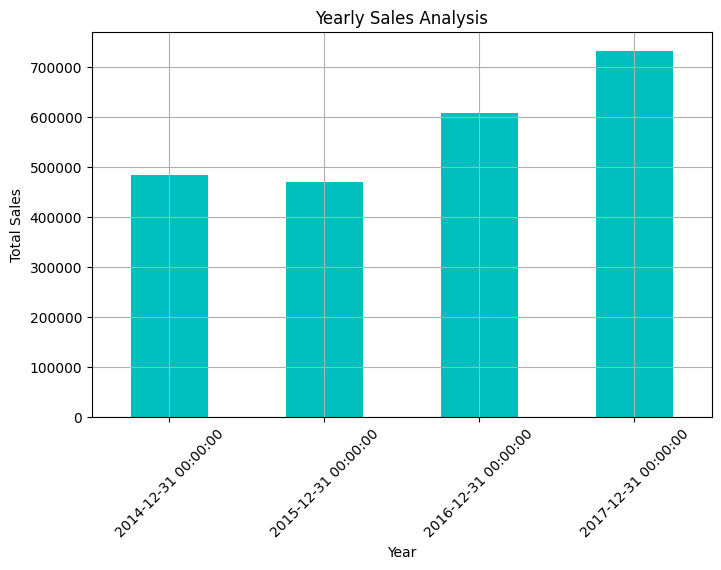

In [116]:
# Yearly Sales Analysis
yearly_sales = store_df['Sales'].resample('YE').sum()
plt.figure(figsize=(8, 5))
yearly_sales.plot(kind='bar', title='Yearly Sales Analysis', color='c')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

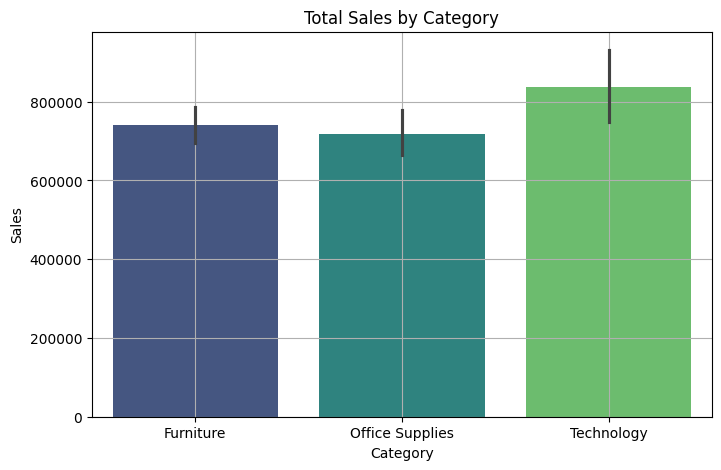

In [117]:
# Sales by Category
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Sales', data=store_df, estimator=sum,palette='viridis', legend=False, hue='Category')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.grid()
plt.show()

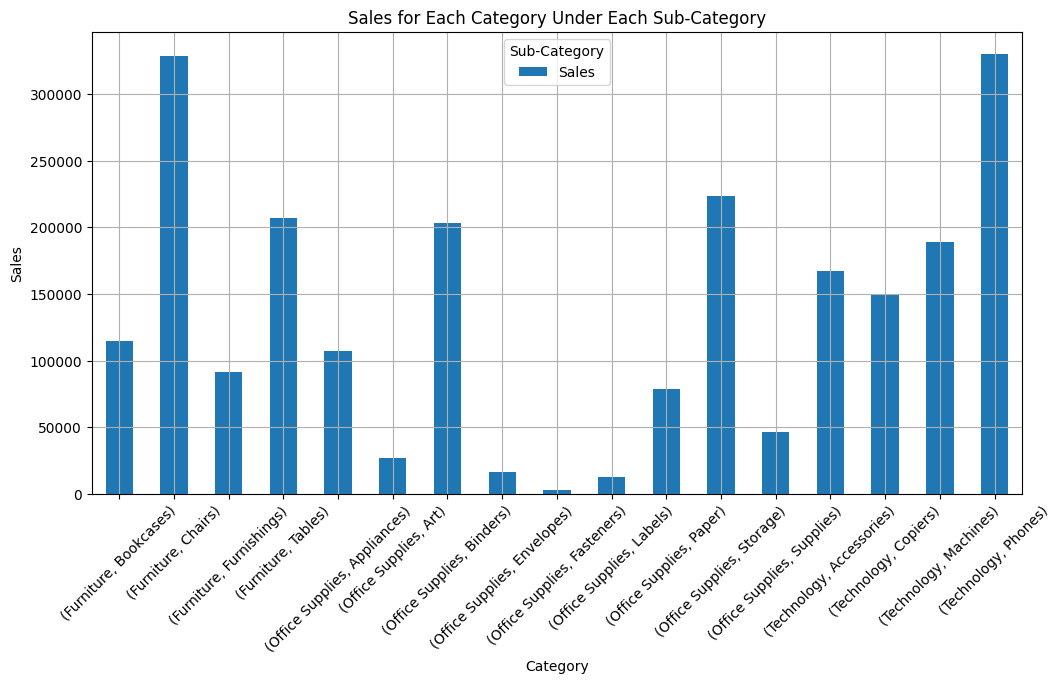

In [118]:
# Group by Category and Sub-Category and sum the Sales
category_subcategory_sales = store_df.groupby(['Category', 'Sub-Category'])['Sales'].sum()

# Plot the results
category_subcategory_sales.plot(kind='bar',  figsize=(12, 6))
plt.title('Sales for Each Category Under Each Sub-Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Sub-Category')
plt.grid()
plt.show()

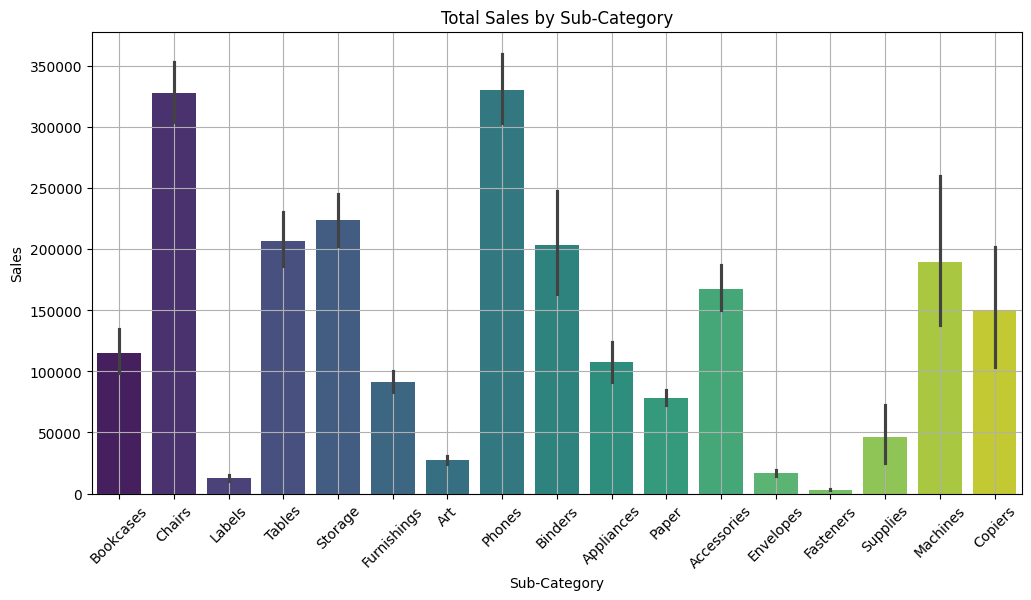

In [119]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Sales', data=store_df, estimator=sum, palette='viridis', legend=False, hue='Sub-Category') 
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

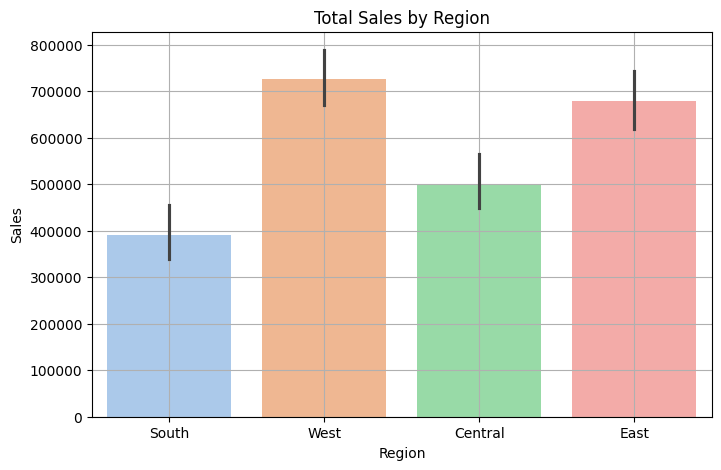

In [120]:
# Sales by Region
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Sales', data=store_df, estimator=sum, palette='pastel', legend=False, hue='Region')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.grid()
plt.show()

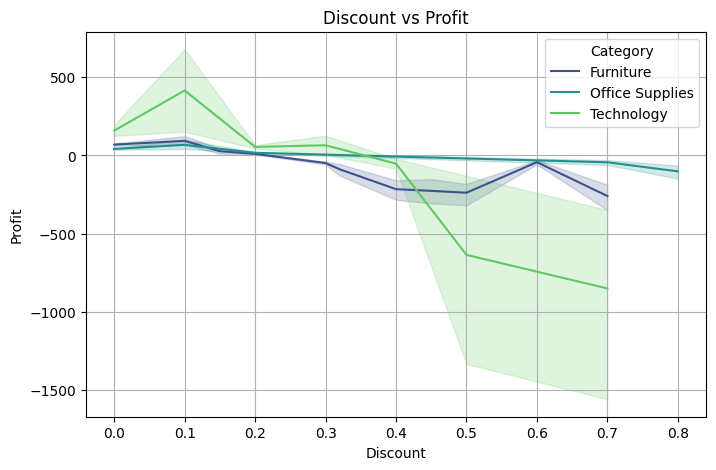

In [121]:
# Impact of Discount on Profit
plt.figure(figsize=(8, 5))
sns.lineplot(x='Discount', y='Profit', data=store_df, hue='Category', palette='viridis')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid()
plt.show()

**Aggregation and Forecasting Preparation**

Aggregate Sales Data Monthly for Forecasting

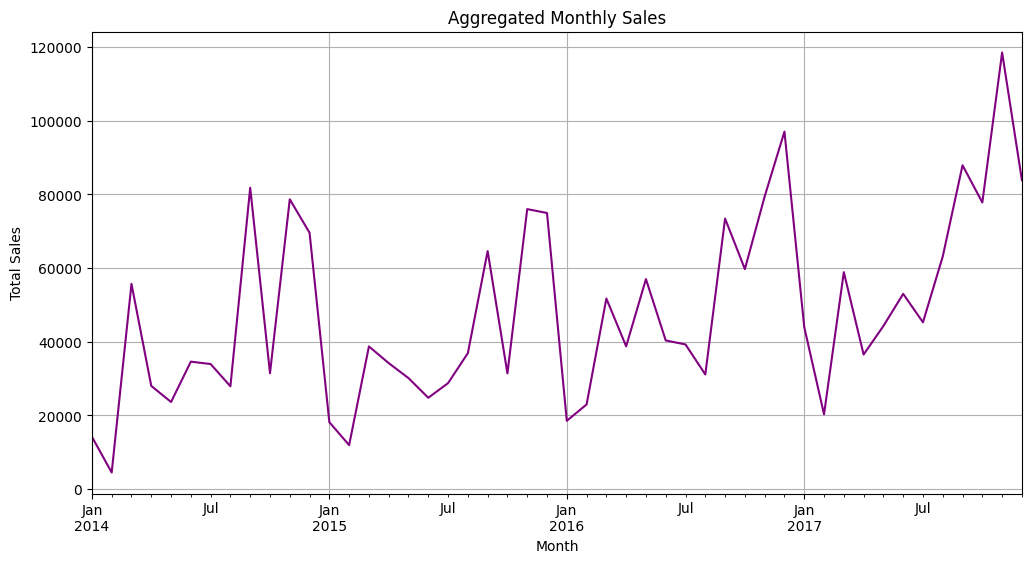

In [122]:
# Aggregate sales data by month
monthly_sales = store_df['Sales'].resample('ME').sum()

# Plot the aggregated monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Aggregated Monthly Sales', color='purple')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

Check for Seasonality and Stationarity

In [45]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --------------------------- ------------ 6.8/9.9 MB 46.5 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 43.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [123]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Augmented Dickey-Fuller test to check stationarity
result = adfuller(monthly_sales)
print("ADF Statistic:", result[0].round(3))
print("p-value:", result[1].round(3))
if result[1] <= 0.05:
    print("Data is stationary.")
else:
    print("Data is not stationary. Differencing might be needed.")

ADF Statistic: -4.494
p-value: 0.0
Data is stationary.


<Figure size 1200x600 with 0 Axes>

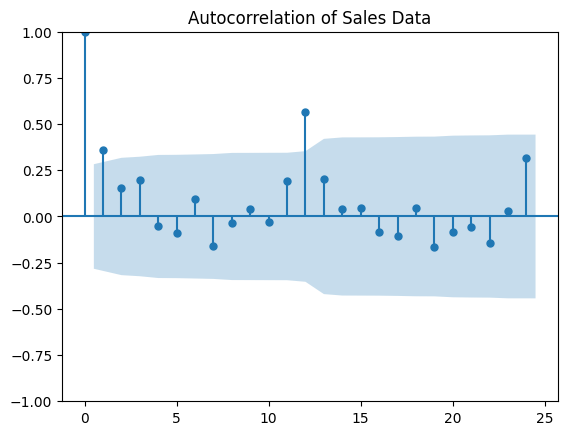

<Figure size 1200x600 with 0 Axes>

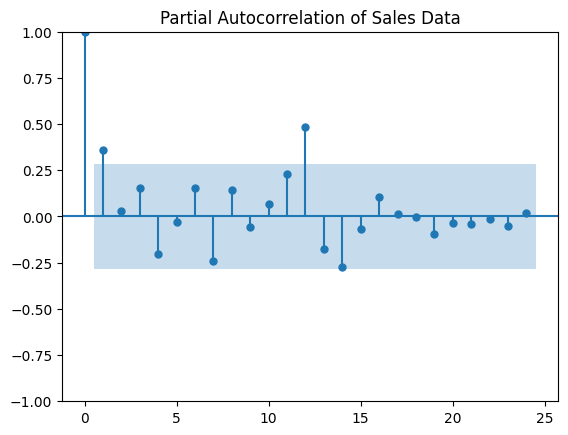

In [124]:
# Plot ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function)
plt.figure(figsize=(12, 6))
plot_acf(monthly_sales, lags=24)
plt.title('Autocorrelation of Sales Data')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(monthly_sales, lags=24)
plt.title('Partial Autocorrelation of Sales Data')
plt.show()

**Step 4: Model Selection and Training**

Since the data is stationary, we can move forward with traditional time series models like ARIMA(AutoRegressive Integrated Moving Average)

In [98]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

In [125]:
%pip install pmdarima

from pmdarima import auto_arima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   --------------------------------------- 614.7/614.7 kB 11.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 20.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1079.899, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1098.419, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1077.120, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1078.132, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1096.565, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1091.142, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1078.916, Time=0.11 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1079.088, Time=0.09 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1081.821, Time=0.08 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1080.494, Time=0.35 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1084.783, Time=0.04 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.418, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1087.911, Time=0.03 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1075.143, Time=0.17 sec
 ARIMA(2,1,0)(1,0,1

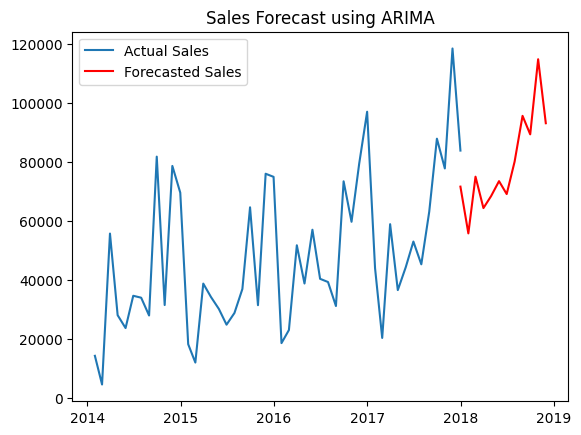

Improved ARIMA RMSE: 20823.36


In [131]:
# Ensure stationarity using differencing if needed
auto_arima_model = auto_arima(monthly_sales, seasonal=True, m=12, stepwise=True, trace=True, suppress_warnings=True)
print(auto_arima_model.summary())

# Fit the best ARIMA model
best_order = auto_arima_model.order
best_seasonal_order = auto_arima_model.seasonal_order

model = ARIMA(monthly_sales, order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit()

# Forecasting future sales
forecast = model_fit.forecast(steps=12)
plt.plot(monthly_sales.index, monthly_sales, label="Actual Sales")
plt.plot(pd.date_range(monthly_sales.index[-1], periods=12, freq="ME"), forecast, label="Forecasted Sales", color='red')
plt.legend()
plt.title("Sales Forecast using ARIMA")
plt.show()

# RMSE calculation
rmse = np.sqrt(mean_squared_error(monthly_sales[-12:], forecast))
print(f"Improved ARIMA RMSE: {rmse:.2f}")

In [99]:
# Fit the ARIMA model (order(p, d, q) = (1, 1, 1) for example)
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

#Accuracy of the model
accuracy = 100 - rmse
print(f"Accuracy: {accuracy}")

Root Mean Squared Error (RMSE): 29756.32380647644
Accuracy: -29656.32380647644


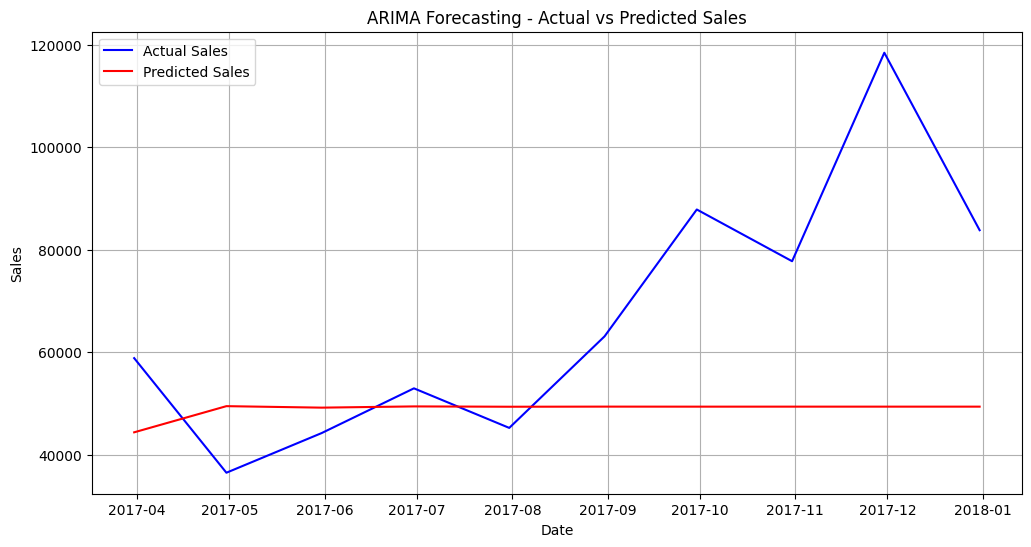

In [100]:
# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales', color='red')
plt.title('ARIMA Forecasting - Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [101]:
import tensorflow as tf

In [136]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(monthly_sales.values.reshape(-1, 1))

# Prepare data for LSTM
def create_sequences(data, time_step):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12  # Looking back 12 months
X, Y = create_sequences(scaled_data, time_step)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, Y_train, epochs=100, batch_size=16, validation_data=(X_test, Y_test), verbose=1)

# Predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(monthly_sales[split+time_step:], predicted))
print(f"Improved LSTM RMSE: {rmse:.2f}")

Epoch 1/100


c:\Users\kasam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 500ms/step - loss: 0.1383 - val_loss: 0.3274
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1200 - val_loss: 0.2737
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1035 - val_loss: 0.2191
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0758 - val_loss: 0.1645
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0609 - val_loss: 0.1126
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0415 - val_loss: 0.0706
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0351 - val_loss: 0.0490
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0431 - val_loss: 0.0451
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0414 - val_loss: 0.0483
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0404 - val_loss: 0.0567
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0385 - val_loss: 0.0693
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0382 - val_loss: 0.0833


In [135]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

In [102]:


# Preprocessing - Scaling the data (LSTM performs better with normalized data)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(monthly_sales.values.reshape(-1, 1))

# Convert the data into a format suitable for LSTM (X, y)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 12  # We can use 12 months (1 year) for forecasting
X, y = create_dataset(scaled_sales, time_step)

# Reshape X for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [103]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(X)

# Inverse scaling to get back to original values
predictions_rescaled = scaler.inverse_transform(predictions)

Epoch 1/10


c:\Users\kasam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1906
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1227 
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0922 
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0559 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0394  
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0468 
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0668
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0720 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0592 
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0459 
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step


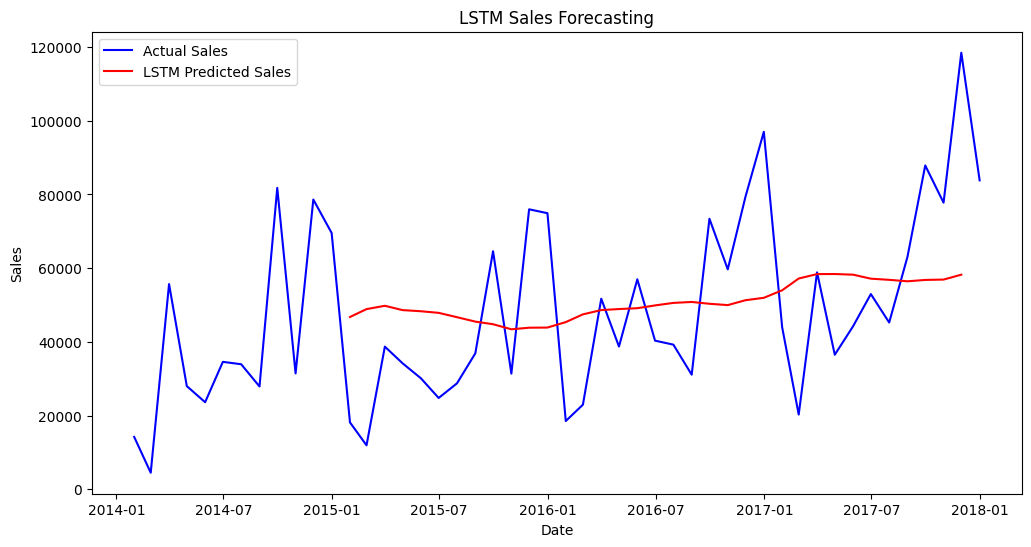

LSTM RMSE: 23426.656243826426


In [137]:

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales', color='blue')
plt.plot(monthly_sales.index[time_step:time_step + len(predictions_rescaled)], predictions_rescaled, label='LSTM Predicted Sales', color='red')
plt.title('LSTM Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluate LSTM model (RMSE)
rmse_lstm = np.sqrt(mean_squared_error(monthly_sales[time_step:time_step + len(predictions_rescaled)], predictions_rescaled))
print(f"LSTM RMSE: {rmse_lstm}")